# Week 7

## Gradient Descent

Gradient descent - Used for solving one of the penalized estimators
problems - General recipe for fitting models - Derivative is telling us
slope (for small change in x, what is change in y) - If you end up with
a minimum point, the derivative will be flat (slope = 0, no change in y
for change in x) - A minimizer is characterized by 2 points 1.
derivative has slope of 0 2. the 2nd derivative has to be positive - To
do gradient descent, compute derivative with respect to every parameter
(partial derivative)

Recall that the solution to a regression problem is given by

$$\left(b_1, b_2, \ldots, b_p\right)=\underset{\beta_1 \ldots \beta_p}{\arg \min } L\left(\beta_0, \beta_1, \ldots, \beta_p\right) $$

where L is referred to as the loss function. If we want to find the
values of parameters which minimize L(), then using the general
principle from calculus, we are interested in looking for values such
that the partial derivative with respect to each beta is 0 . In the case
of linear regression, the derivatives can be computed by hand, and there
exists a closed form solution to the above system of equations However,
in many other models, we don’t have a method for obtaining closed form
solutions. In such cases, the general strategy is as follows: - Compute
gradient - Choose a step size η between (0,1) - Start off at some
randomized initialized value and at every step, choose a step size
between 0 and 1 - Perform gradient descent - Take one step in direction
of negative gradient(direction that leads to decrease in the objective
function, L) - Repeat those steps until you reach some sort of stable
minimum (when change of L is not significant to continue) This is how
lasso problem is being solved

In [1]:

attach(cars)


In [3]:
Loss <- function(b, x, y){
    squares <- (y - b[1] - b[2]*x)^2
    return(sum(squares))
}
b <- rnorm(2)
Loss(b, cars$speed, cars$dist)

[1] 121957.9

In [5]:
grad <- function(b, Loss, x, y, eps=1e-5){
    b0_up <- Loss(c(b[1] + eps, b[2]), x, y)
    b0_dn <- Loss(c(b[1] - eps, b[2]), x, y)

    b1_up <- Loss(c(b[1], b[2] + eps), x, y)
    b1_dn <- Loss(c(b[1], b[2] - eps), x, y)

    grad_b0 <- (b0_up - b0_dn) / (2 * eps)
    grad_b1 <- (b1_up - b1_dn) / (2 * eps)
    
    return(c(grad_b0, grad_b1))
}

grad(b, Loss, cars$speed, cars$dist)

[1]  -4233.39 -75920.84

In [12]:
step <- 1000
L <- rep(NA, step)
eta <- 1e-7
b <- 10 * rnorm(2)
x <- cars$speed
y <- cars$dist

for (i in 1:step){
    b <- b - eta * grad(b, Loss, x, y)
    L[i] <- Loss(b, x, y)
}


[1] -2.846637  2.521177

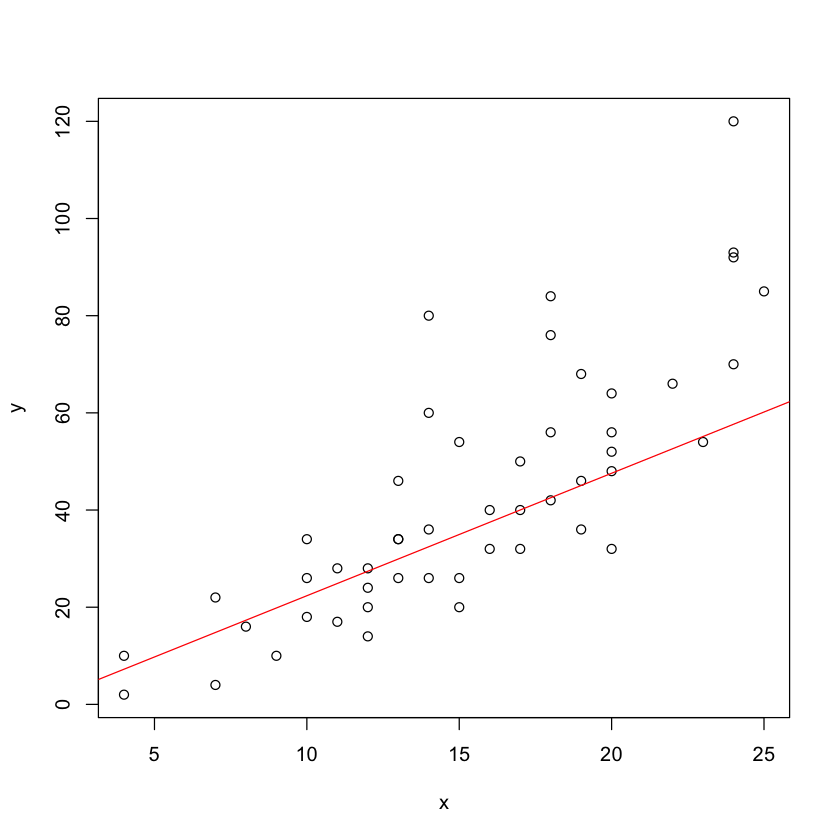

In [13]:
b
plot(y ~ x, cars)
abline(b, col="red")

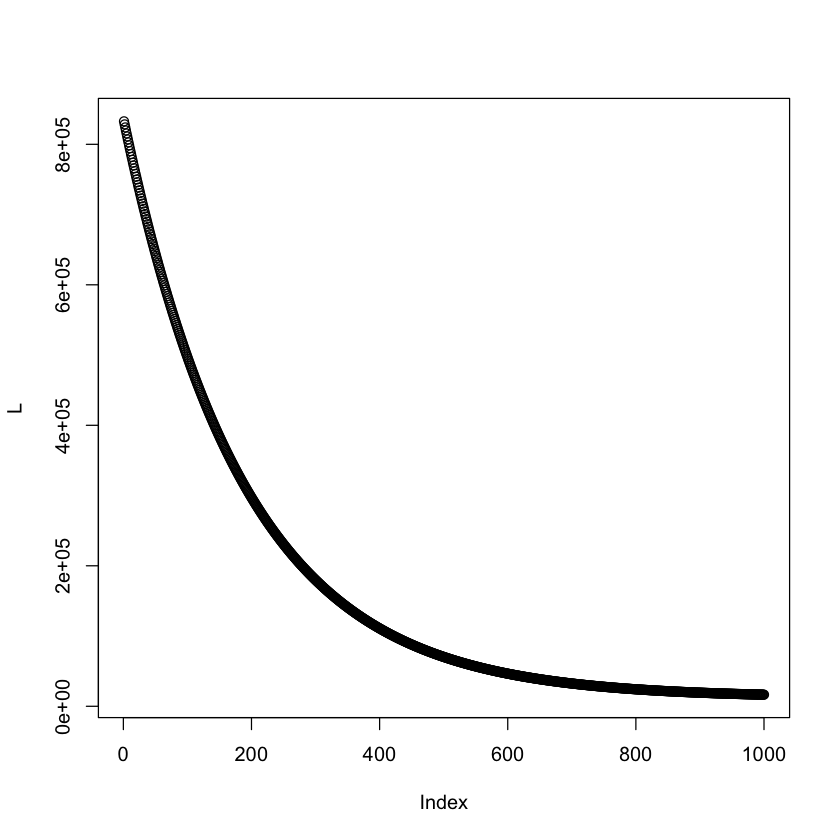

In [15]:
plot(L)

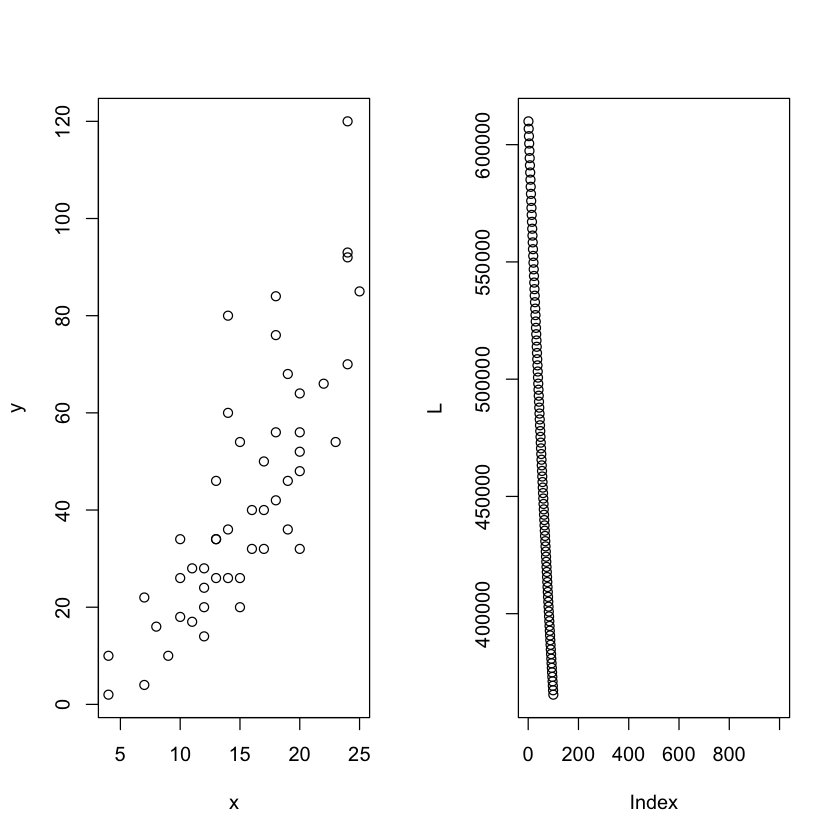

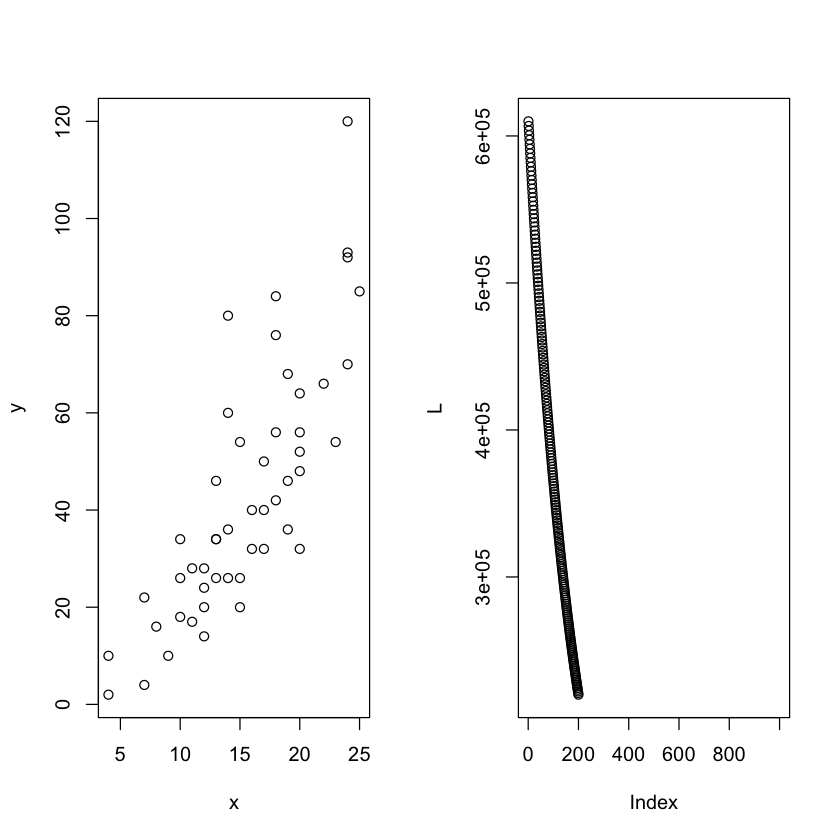

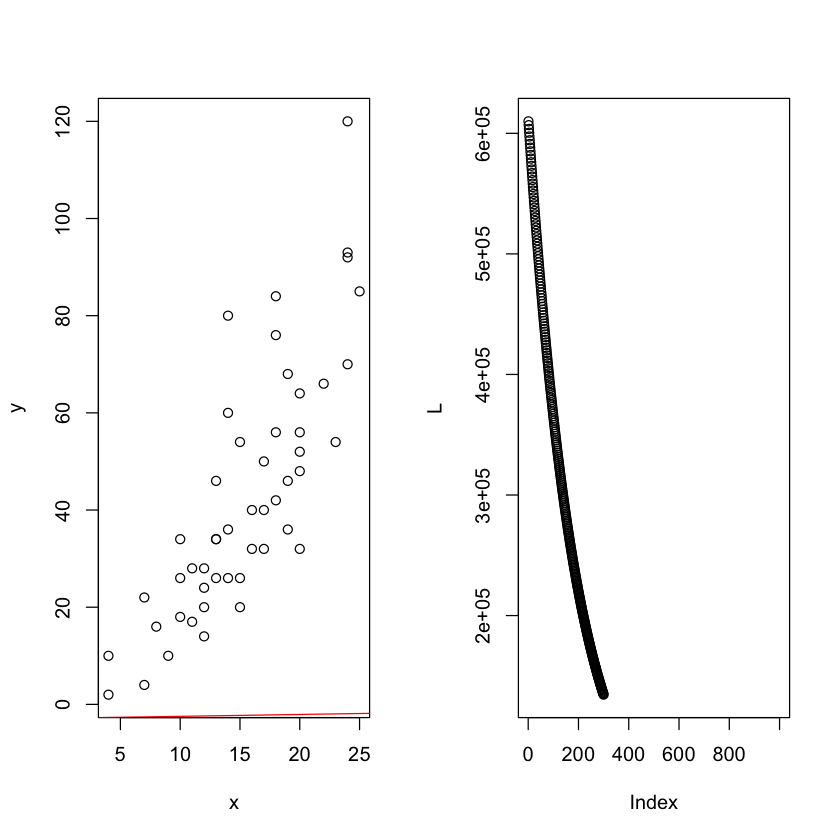

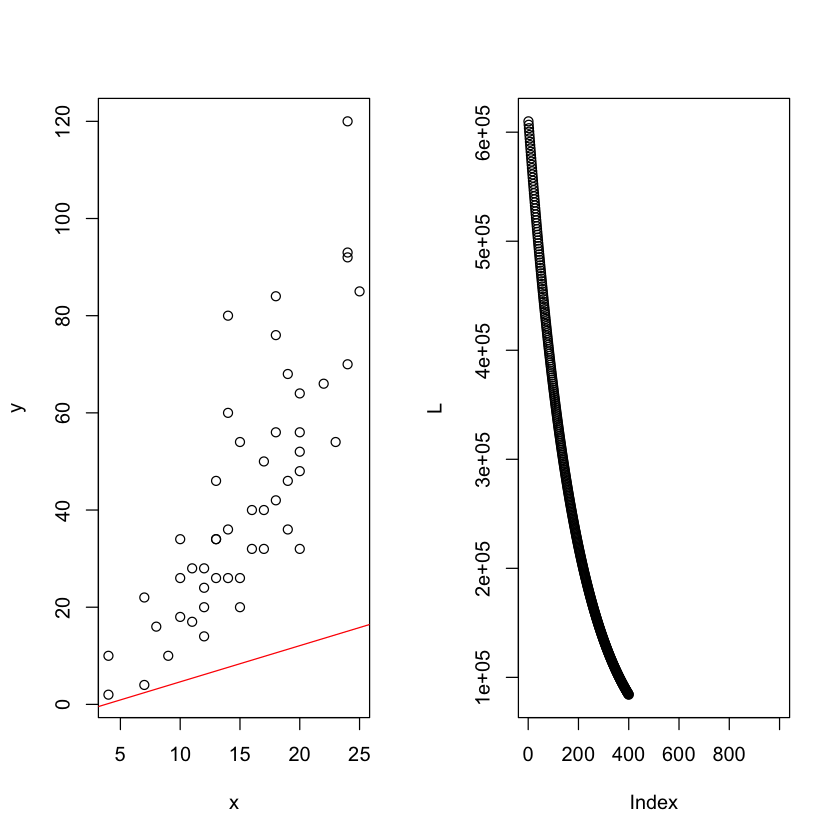

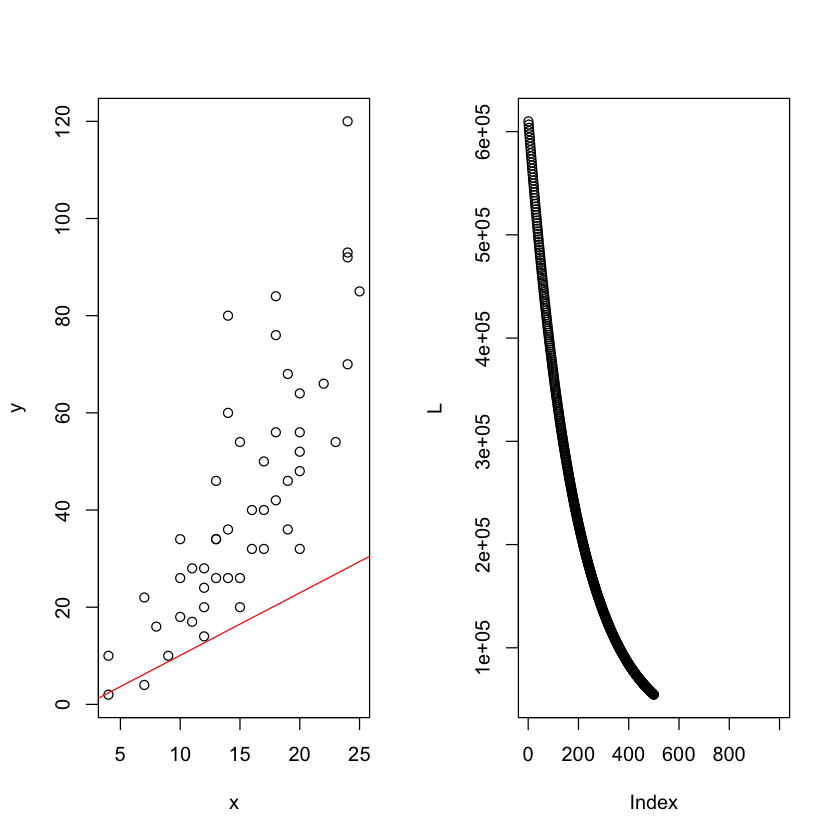

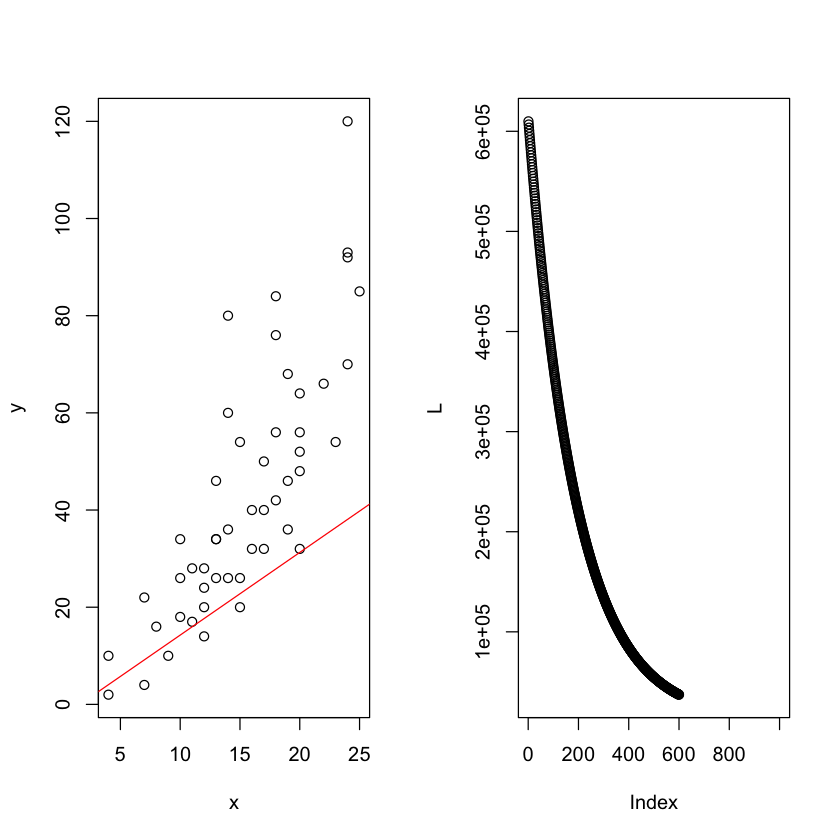

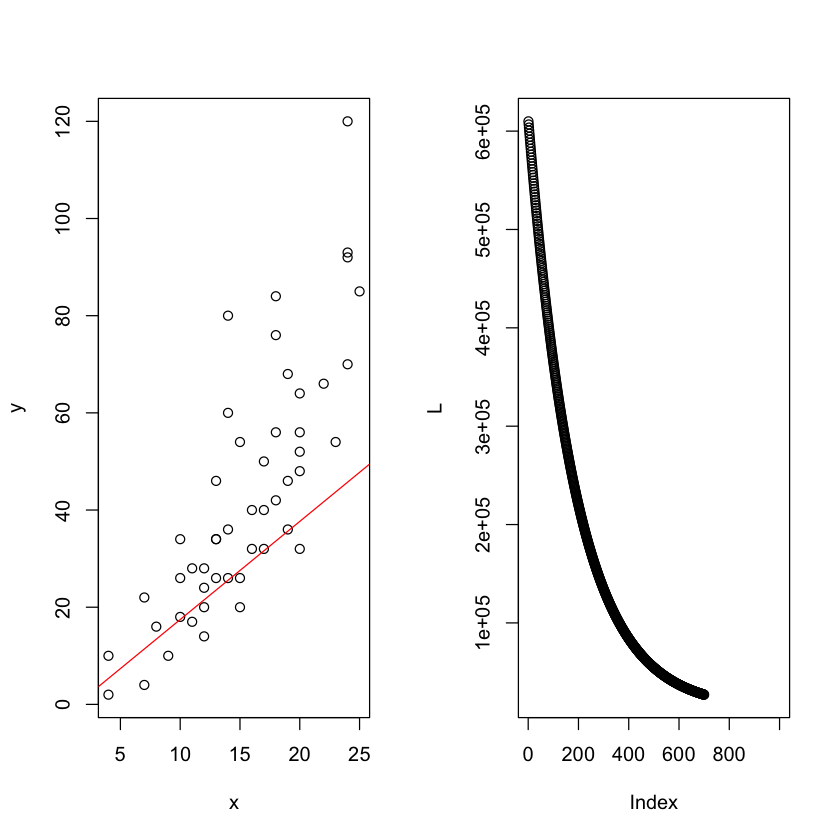

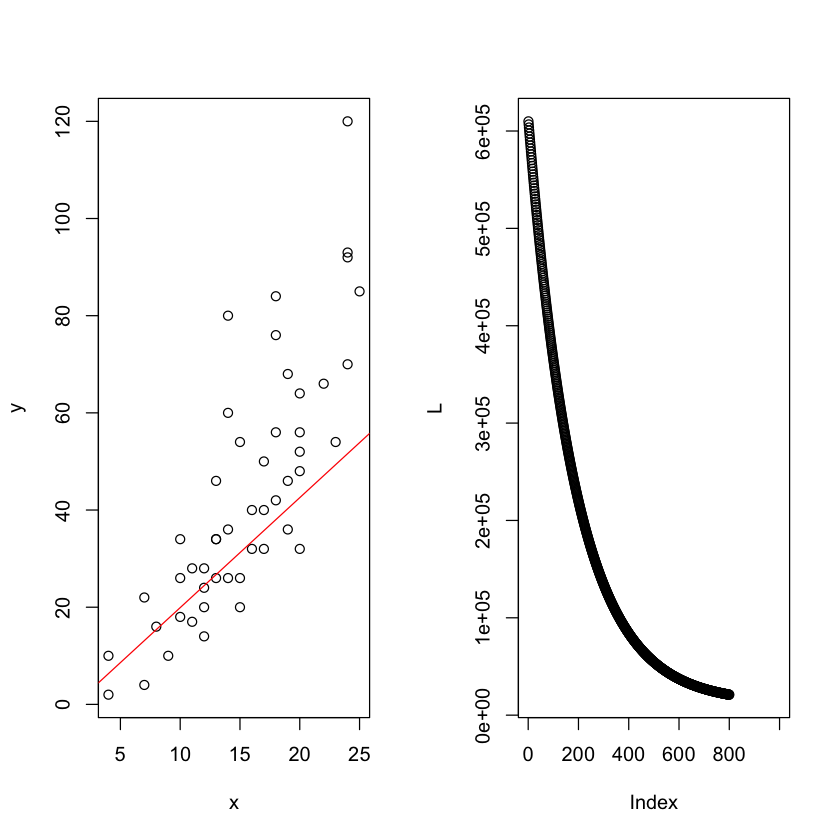

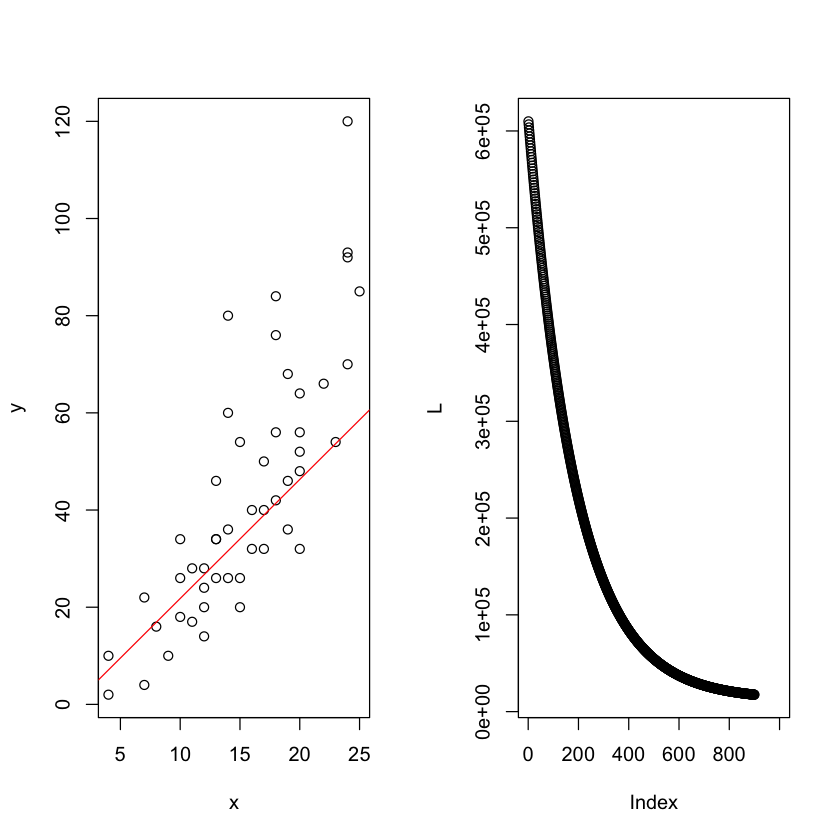

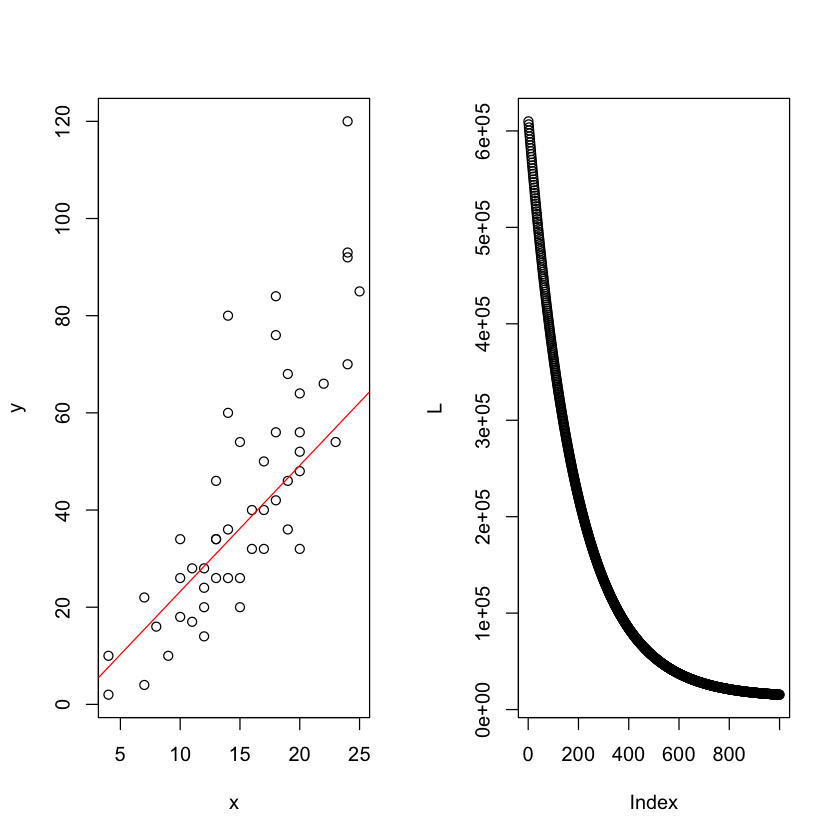

In [16]:
step <- 1000
L <- rep(NA, step)
eta <- 1e-7
b <- 10 * rnorm(2)
x <- cars$speed
y <- cars$dist

for (i in 1:step){
    b <- b - eta * grad(b, Loss, x, y)
    L[i] <- Loss(b, x, y)
    if (i %% 100 == 0){
        par(mfrow=c(1,2))
        plot(y~x,cars)
        abline(b, col = 'red')

        plot(L)
    }
}

## Logistic Regression

#### Packages we will require this week

$$
\boxed{y = \beta_0 + \beta_1 x_1 + \dots \beta_p x_p}
$$

looking at different loss functions:

1.  Least-squares:

$$
L(\beta) = \sum_{i=1}^n \| y_i - \beta_0 - \beta_1 x_1 - \dots - \beta_p x_p\|^2
$$

1.  Penalized least squares/LASSO:

$$
L(\beta) = \sum_{i=1}^n \| y_i - \beta_0 - \beta_1 x_1 - \dots - \beta_p x_p\|^2 + \lambda \|{\beta}\|_1
$$

# Classification

We will be using the following dataset for the examples here

> Breast cancer dataset: This dataset contains measurements of various
> characteristics of breast cancer cells, with the goal of predicting
> whether a tumor is benign or malignant.

The problem with linear regression for binary responses

Let’s start by looking at an example. Imagine we have a dataset with a
binary response variable (0 or 1) and a continuous predictor variable.
We might be tempted to use linear regression with the lm() function to
model the relationship between the predictor and response variables.
After all, linear regression is a powerful and flexible tool that can be
used to model a wide range of relationships between variables.

However, when we use linear regression with a binary response variable,
we quickly run into a problem. The linear regression model will give us
a predicted value for the response variable for any given value of the
predictor variable, but this predicted value is not a probability. The
predicted value can take on any value between 0 and 1, but it doesn’t
necessarily represent the probability of the response variable being a
1.

To see why this is a problem, consider the following scenario. Suppose
we have a dataset with a binary response variable and a continuous
predictor variable. We fit a linear regression model to the data using
the lm() function in R, and we get a predicted value of 0.8 for the
response variable when the predictor variable has a value of 1.5. What
does this predicted value of 0.8 actually mean?

If we interpret the predicted value as a probability, we might conclude
that the probability of the response variable being a 1 when the
predictor variable has a value of 1.5 is 0.8. But this interpretation is
incorrect. The predicted value from linear regression is not a
probability, and it can take on values greater than 1 or less than 0.

$$\newcommand{\logodds}{\mathop{\log\text{-odds}}}$$

$$
\begin{aligned}
\logodds(p(x)) = b_0 + b_1 x\\ \\ \\ \\
p(x) = \frac{1}{1 + \exp(\beta_0 + \beta_1 x)}
\end{aligned}
$$

## The need for logistic regression

So, what do we do when we have a binary response variable and we want to
model the relationship between the predictor and response variables?
This is where logistic regression comes in. Logistic regression is a
type of generalized linear model that is specifically designed for
binary response variables.

The main idea behind logistic regression is to transform the predicted
values from linear regression so that they represent probabilities. We
do this using a function called the logistic function, which maps any
value between negative infinity and positive infinity to a value between
0 and 1. The logistic function is a sigmoidal curve that looks like an
elongated S-shape. By applying the logistic function to the predicted
values from linear regression, we can transform them into probabilities
that represent the probability of the response variable being a 1.

In the next section, we’ll dive into the details of logistic regression
and see how it works in practice using the breast cancer dataset.

#### Odds and odds ratios

Let’s start by defining the odds of an event occurring. The odds of an
event occurring are defined as the probability of the event occurring
divided by the probability of the event not occurring. For example, if
the probability of a basketball team winning a game is 0.6, then the
odds of the team winning the game are 0.6/0.4 = 1.5.

Odds ratios are a way to compare the odds of an event occurring between
two different groups. The odds ratio is defined as the ratio of the odds
of an event occurring in one group to the odds of the event occurring in
another group. For example, if the odds of a basketball team winning a
game are 1.5 in one group and 2.0 in another group, then the odds ratio
of the first group to the second group is 1.5/2.0 = 0.75.

#### Logistic regression model

Now let’s move on to the logistic regression model. The logistic
regression model is a type of generalized linear model that models the
probability of an event occurring as a function of one or more predictor
variables. The logistic regression model uses the logistic function,
also known as the sigmoid function, to model the relationship between
the predictor variables and the probability of the event occurring.

**The sigmoid function is given as follows**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

In logistic regression, the underlying model is assumed to be of the
form

$$
\boxed{p(x) = \sigma\Big(\beta_0 + \beta_1 x\Big) = \frac{1}{1 + \exp({-\beta_0 - \beta_1 x})}}
$$

where $p(x)$ where is the probability of the event occurring given the
value of the predictor variable $x$, and $b0$ and $b1$ are the
**intercept** and **slope** coefficients of the logistic regression
model, respectively.

> $p(x)$ is gauranteed to be a probability for all values of $x$.

Notice how this is similar to **linear regression** which has

$$
y(x) = \beta_0 + \beta_1 x
$$

The logistic function has an S-shaped curve and maps any real-valued
input to a probability between 0 and 1. As such, the logistic regression
model is well-suited for modeling binary response variables, where the
goal is to predict the probability of an event occurring (e.g., whether
a customer will buy a product or not).m

## Logistic regression example

The `glm()` function fits a generalized linear model, which includes
logistic regression as a special case.

In [18]:
set.seed(123)
x <- rnorm(1000)
y <- rbinom(1000, size=1, prob = exp(0.5 + 0.8*x)/ (1 + exp(0.5+ 0.8*x)))


[1] 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1
  [38] 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0
  [75] 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0
 [112] 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1
 [149] 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0
 [186] 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1
 [223] 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 [260] 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 [297] 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 [334] 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 [371] 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 [408] 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 [445] 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1
 [482] 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 [519] 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1
 [556] 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0
 [593] 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 [630] 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 [667] 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0
 [704] 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 [741] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0
 [778] 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0
 [815] 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0
 [852] 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1
 [889] 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 [926] 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 [963] 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1
[1000] 0

In [20]:
model <- glm(y ~ x, family=binomial)
summary(model)



Call:
glm(formula = y ~ x, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1935  -1.1691   0.6904   0.9635   1.8280  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.49917    0.06916   7.218 5.29e-13 ***
x            0.73716    0.07696   9.578  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1335.7  on 999  degrees of freedom
Residual deviance: 1228.5  on 998  degrees of freedom
AIC: 1232.5

Number of Fisher Scoring iterations: 4


ERROR: Error in sigmoid(coef(model)[1] + coef(model)[2] * x_test): could not find function "sigmoid"


In [24]:
sigmoid <- function(x){
    1/(1+exp(-x))
}
x_test = -5.5
sigmoid(coef(model)[1] + coef(model)[2] * x_test)
predict(model, newdata = data.frame(x=x_test), type="response")

(Intercept) 
 0.02778092

1 
0.02778092

#### Logistic regression for breast cancer

Let’s start by fitting a logistic regression model to the breast cancer
dataset using the `glm()` function in R.

In [26]:
library(tidyverse)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
col_names <- c("id", "diagnosis", paste0("feat", 1:30))
df <- read_csv(
    url, col_names, col_types = cols()
    ) %>% 
    select(-id) %>% 
    mutate(outcome = ifelse(diagnosis == "M", 1, 0)) %>%
    select(-diagnosis)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   0.3.5
v tibble  3.2.1     v dplyr   1.1.2
v tidyr   1.2.1     v stringr 1.4.1
v readr   2.1.3     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [33]:
df = df %>% mutate_at("outcome", factor)
head(df)
model <- glm(outcome ~ ., data = df, family = binomial)
summary(model)




feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,⋯,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = outcome ~ ., family = binomial, data = df)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49   -8.49   -8.49    8.49    8.49  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.881e+06  2.816e+05 -10.233  < 2e-16 ***
feat1        2.427e+06  2.693e+05   9.014  < 2e-16 ***
feat2        1.958e+05  1.471e+04  13.313  < 2e-16 ***
feat3        1.473e+06  2.464e+04  59.791  < 2e-16 ***
feat4       -1.301e+05  3.907e+03 -33.301  < 2e-16 ***
feat5       -1.525e+08  8.361e+06 -18.234  < 2e-16 ***
feat6       -6.428e+06  3.213e+06  -2.001  0.04539 *  
feat7        1.042e+06  1.408e+06   0.740  0.45959    
feat8       -1.716e+07  5.382e+06  -3.188  0.00143 ** 
feat9        4.049e+07  7.772e+05  52.093  < 2e-16 ***
feat10      -4.233e+07  2.169e+06 -19.519  < 2e-16 ***
feat11       3.328e+07  1.169e+06  28.478  < 2e-16 ***
feat12       6.368e+06  2.005e+05  31.763  < 2e-16 ***
feat13       1.701e+06  4.720e+04  36.032  < 2e

ERROR: Error in names(new_patient) <- paste0("feat", 1:30): 'names' attribute [30] must be the same length as the vector [2]


------------------------------------------------------------------------

The output of the summary() function provides a summary of the model,
including the coefficients of each predictor, their standard errors, and
the corresponding p-values. The coefficients represent the log odds
ratio of the response variable for each predictor. We can exponentiate
the coefficients to get the odds ratios:m

In [37]:
new_patient <- data.frame(matrix(rnorm(30), nrow = 1))
names(new_patient) <- paste0("feat", 1:30)
new_patient
predict(model, newdata=new_patient, type="response")

feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,⋯,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.5476276,3.290517,0.7366855,1.420575,-0.3376806,-0.03795763,0.4486071,1.676522,-0.3114745,0.8536157,⋯,-1.228445,-0.475615,1.616578,1.450128,1.109019,-0.5709039,-1.881431,-1.175698,0.9525565,-0.2905679


1 
2.220446e-16